<a href="https://colab.research.google.com/github/Akhilchegonda/Akhil_INFO5731_Fall2023/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [2]:
# Write your code here
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,4000):
  url = 'https://www.amazon.com/Konquest-KBP-2704A-Automatic-Pressure-Monitor/product-reviews/B077CXGSJW/ref=cm_cr_getr_d_paging_btm_next_7?ie=UTF8&reviewerType=all_reviews&pageNumber={'
  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  reviews = s.find_all('a',class_='review-title-content')
  for i in range(len(reviews)):
    titles.append(reviews[i].get_text().strip())
  reviews= s.find_all('span',class_='review-text-content')
  for r in range(0,len(reviews)):
    text.append(reviews[r].get_text().strip())
df_reviews= pd.DataFrame({
    'Title' : titles,
    'Review': text
})

# Save the DataFrame as a CSV file
df_reviews.to_csv('reviews.csv', index=False)

# Read the saved CSV file and print the first few rows
df = pd.read_csv('reviews.csv')
print(df.head())
print(f'Shape of the data frame: {df_reviews.shape}')
df_reviews





                                               Title  \
0               5.0 out of 5 stars\nGreat bp machine   
1  4.0 out of 5 stars\n8 months of use - good rea...   
2                  5.0 out of 5 stars\nVery accurate   
3                  4.0 out of 5 stars\nVery accurate   
4  5.0 out of 5 stars\nOutstanding Performance an...   

                                              Review  
0  Very accurate with my old machine which i thou...  
1  I purchased this 8 months ago for my boyfriend...  
2  I like this blood pressure because it goes by ...  
3  I like that it is accurate, as measured agains...  
4  I've recently purchased the Konquest Automatic...  
Shape of the data frame: (1770, 2)


,Title,Review
0,5.0 out of 5 stars\nGreat bp machine,Very accurate with my old machine which i thou...
1,4.0 out of 5 stars\n8 months of use - good rea...,I purchased this 8 months ago for my boyfriend...
2,5.0 out of 5 stars\nVery accurate,I like this blood pressure because it goes by ...
3,4.0 out of 5 stars\nVery accurate,"I like that it is accurate, as measured agains..."
4,5.0 out of 5 stars\nOutstanding Performance an...,I've recently purchased the Konquest Automatic...
...,...,...
1765,5.0 out of 5 stars\nThat it's simple,I really like this monitor....since my yearly ...
1766,5.0 out of 5 stars\nWorks great!,Love the case it comes in. Easy to read displa...
1767,5.0 out of 5 stars\nHow accurate this machine is,The Ease of use is pretty simple
1768,4.0 out of 5 stars\nTakes a little practice to...,Given as a gift to my sister. She likes the e...


In [4]:
# Write your code here
data_url = "reviews.csv"
train = pd.read_csv(data_url)
train['word_count'] = train['Review'].apply(lambda x: len(str(x).split(" ")))
print(train['word_count'].head())



#1.remove noise such as special characters
import re
train['remove noise'] = train['Review'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', '', x))
print(train['remove noise'].head())

#punctuation
train['punctuation'] = train['Review'].str.replace('[^\w\s]','')
print(train['punctuation'].head())

#(2) Remove numbers.
train['Remove numbers'] = train['Review'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
print(train['Remove numbers'].head())

#(3) Remove stopwords by using the stopwords list.
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
train[' Remove stopwords'] = train['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
stop = stopwords.words('english')
train[' Remove stopwords'] = train['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(train[' Remove stopwords'].head())

#(4) Lowercase all texts
train[' Lowercase all texts'] = train['Review'].apply(lambda x: " ".join(word.lower() for word in x.split()))
print(train[' Lowercase all texts'].head())

#(5) Stemming.
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['Review'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
print(train['Review'].head())

#(6) Lemmatization.
from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download("omw-1.4")
train['Lemmatization '] = train['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['Lemmatization '].head()


0    100
1     63
2     33
3     80
4    138
Name: word_count, dtype: int64
0    Very accurate with my old machine which i thou...
1    I purchased this 8 months ago for my boyfriend...
2    I like this blood pressure because it goes by ...
3    I like that it is accurate as measured against...
4    Ive recently purchased the Konquest Automatic ...
Name: remove noise, dtype: object
0    Very accurate with my old machine which i thou...
1    I purchased this 8 months ago for my boyfriend...
2    I like this blood pressure because it goes by ...
3    I like that it is accurate as measured against...
4    Ive recently purchased the Konquest Automatic ...
Name: punctuation, dtype: object
0    Very accurate with my old machine which i thou...
1    I purchased this  months ago for my boyfriend ...
2    I like this blood pressure because it goes by ...
3    I like that it is accurate, as measured agains...
4    I've recently purchased the Konquest Automatic...
Name: Remove numbers, dtype: obj

<ipython-input-4-d837db188563>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  train['punctuation'] = train['Review'].str.replace('[^\w\s]','')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    Very accurate old machine thought getting old ...
1    I purchased 8 months ago boyfriend high blood ...
2    I like blood pressure goes arm wrist. It’s eas...
3    I like accurate, measured Doctor’s blood press...
4    I've recently purchased Konquest Automatic Upp...
Name:  Remove stopwords, dtype: object
0    very accurate with my old machine which i thou...
1    i purchased this 8 months ago for my boyfriend...
2    i like this blood pressure because it goes by ...
3    i like that it is accurate, as measured agains...
4    i've recently purchased the konquest automatic...
Name:  Lowercase all texts, dtype: object
0    Very accurate with my old machine which i thou...
1    I purchased this 8 months ago for my boyfriend...
2    I like this blood pressure because it goes by ...
3    I like that it is accurate, as measured agains...
4    I've recently purchased the Konquest Automatic...
Name: Review, dtype: object


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    Very accurate with my old machine which i thou...
1    I purchased this 8 month ago for my boyfriend ...
2    I like this blood pressure because it go by th...
3    I like that it is accurate, a measured against...
4    I've recently purchased the Konquest Automatic...
Name: Lemmatization , dtype: object

In [5]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# Tokenize the text and generate the N-grams
tokens = df['Review'].apply(lambda x: x.lower().split())
trigrams = tokens.apply(lambda x: list(ngrams(x, 3)))

# Count the frequency of each trigram
trigram_counts = Counter([item for sublist in trigrams for item in sublist])

# Print the top 10 most frequent trigrams
print(trigram_counts.most_common(10))


[(('with', 'my', 'old'), 354), (('my', 'blood', 'pressure'), 354), (('the', 'konquest', 'automatic'), 354), (('konquest', 'automatic', 'upper'), 354), (('automatic', 'upper', 'arm'), 354), (('upper', 'arm', 'blood'), 354), (('arm', 'blood', 'pressure'), 354), (('blood', 'pressure', 'monitor'), 354), (('easy', 'to', 'read'), 354), (('the', 'ease', 'of'), 354)]


In [6]:
import pandas as pd
import nltk
from nltk.util import ngrams
import nltk
nltk.download('punkt')



# Tokenize the text into individual words
df['tokens'] = df['Review'].apply(nltk.word_tokenize)

# Generate all bigrams in the text
df['bigrams'] = df['tokens'].apply(lambda x: list(ngrams(x, 2)))

# Count the frequency of each word in the text
word_freq = {}
for tokens in df['tokens']:
    for token in tokens:
        if token in word_freq:
            word_freq[token] += 1
        else:
            word_freq[token] = 1

# Calculate the probability of each bigram
bigram_prob = {}
for bigrams in df['bigrams']:
    for bigram in bigrams:
        w2, w1 = bigram
        count_w2_w1 = bigrams.count(bigram)
        count_w2 = word_freq[w2]
        bigram_prob[bigram] = count_w2_w1 / count_w2

# Print the probabilities for all bigrams
for bigram, prob in bigram_prob.items():
    print(f'{bigram}: {prob}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


('Very', 'accurate'): 0.005649717514124294
('accurate', 'with'): 0.002824858757062147
('with', 'my'): 0.0011299435028248588
('my', 'old'): 0.0011299435028248588
('old', 'machine'): 0.0018832391713747645
('machine', 'which'): 0.005649717514124294
('which', 'i'): 0.005649717514124294
('i', 'thought'): 0.0009416195856873823
('thought', 'was'): 0.005649717514124294
('was', 'getting'): 0.0018832391713747645
('getting', 'old'): 0.002824858757062147
('old', 'and'): 0.0018832391713747645
('and', 'not'): 0.00025680534155110427
('not', 'giving'): 0.002824858757062147
('giving', 'me'): 0.002824858757062147
('me', 'the'): 0.002824858757062147
('the', 'right'): 0.0002690341673392521
('right', 'numbers'): 0.005649717514124294
('numbers', 'because'): 0.002824858757062147
('because', 'they'): 0.002824858757062147
('they', 'were'): 0.005649717514124294
('were', 'all'): 0.005649717514124294
('all', 'over'): 0.0018832391713747645
('over', 'the'): 0.005649717514124294
('the', 'place'): 0.00026903416733925

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import nltk
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [19]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define function to extract noun phrases from a text
def extract_noun_phrases(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = nltk.pos_tag(word_tokenize(text))
    noun_phrases = []
    for i in range(len(tagged_tokens)):
        if tagged_tokens[i][1].startswith('NN'):
            np = tagged_tokens[i][0]
            j = i + 1
            while j < len(tagged_tokens) and tagged_tokens[j][1].startswith('NN'):
                np += ' ' + tagged_tokens[j][0]
                j += 1
            np = lemmatizer.lemmatize(np.lower())
            if np not in stop_words:
                noun_phrases.append(np)
    return noun_phrases

# Read the reviews from the file
with open('reviews.csv') as f:
    reviews = f.read().splitlines()

# Extract noun phrases from each review and calculate their frequencies
all_noun_phrases = defaultdict(int)
review_noun_phrases = []
for review in reviews:
    noun_phrases = extract_noun_phrases(review)
    review_noun_phrases.append(noun_phrases)
    for np in noun_phrases:
        all_noun_phrases[np] += 1

# Calculate the maximum frequency of each noun phrase
max_frequencies = {}
for np in all_noun_phrases:
    max_frequencies[np] = max([all_noun_phrases[np] for np_list in review_noun_phrases])

# Calculate the relative probabilities of each review
review_probs = []
for i in range(len(reviews)):
    probs = {}
    for np in review_noun_phrases[i]:
        probs[np] = all_noun_phrases[np] / max_frequencies[np]
    review_probs.append(probs)

# Print the results in a table
print('\t' + '\t'.join(all_noun_phrases.keys()))
for i in range(len(reviews)):
    row = [str(i+1)]
    for np in all_noun_phrases:
        if np in review_probs[i]:
            row.append(str(review_probs[i][np]))
        else:
            row.append('0')
    print('\t'.join(row))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


	title	review	star	great bp machine	bp machine	machine	number	place	week	panic	night	guess	pressure changes	change	time	year	blood pressure	pressure	minute	lot	head	month	use	cuff	boyfriend	preeclampsia	labor	ick	cuff bubbles	bubble	read	arm	wrist	rating	ten	purchase	doctor ’	’	bit	problem	measurement	way	itstarts	reading	second	accuracy	people	performance	konquest automatic upper arm blood pressure monitor	automatic upper arm blood pressure monitor	upper arm blood pressure monitor	arm blood pressure monitor	blood pressure monitor	pressure monitor	monitor	expectations.accuracy	pressure monitors	device	amount	trust	addition	variety	backlit display	display	feature	light	konquest blood pressure monitor	design	quality	comfort	functionality	monitor ....	....	exam	case	easy	result	function	alternate cuff sizes	cuff sizes	size	ease	practice	gift	sister	work	seems	one	doc
1	1.0	1.0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [24]:
# Write your code here
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess the data
stop_words = set(stopwords.words('english'))
preprocessed_reviews = []
for texts in df['Review']:
    # Tokenize the texts
    tokens = word_tokenize(texts.lower())
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    preprocessed_review = ' '.join(tokens)
    preprocessed_reviews.append(preprocessed_review)

# Compute TF-IDF weights
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_reviews)

# Define the query
query = "A very good machine and it is accuate to monitor blood pressure  "

# Preprocess the query
query_tokens = word_tokenize(query.lower())
query_tokens = [token for token in query_tokens if token not in stop_words]
query = ' '.join(query_tokens)

# Compute the cosine similarity between the query and the documents
query_tfidf = tfidf_vectorizer.transform([query])
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Rank the documents by their similarity to the query
document_scores = list(zip(range(len(cosine_similarities)), cosine_similarities))
document_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 most similar documents to the query
for i in range(10):
    document_index = document_scores[i][0]
    document_score = document_scores[i][1]
    print(f"Document {document_index + 1} - Score: {document_score}")
    print(df.loc[document_index, 'Review'])
    print("\n")







Document 6 - Score: 0.2668803054993609
I really like this monitor....since my yearly exam I was told I may be pre- diabetic ...I can monitor my blood pressure it easy to use and understand.


Document 16 - Score: 0.2668803054993609
I really like this monitor....since my yearly exam I was told I may be pre- diabetic ...I can monitor my blood pressure it easy to use and understand.


Document 26 - Score: 0.2668803054993609
I really like this monitor....since my yearly exam I was told I may be pre- diabetic ...I can monitor my blood pressure it easy to use and understand.


Document 36 - Score: 0.2668803054993609
I really like this monitor....since my yearly exam I was told I may be pre- diabetic ...I can monitor my blood pressure it easy to use and understand.


Document 46 - Score: 0.2668803054993609
I really like this monitor....since my yearly exam I was told I may be pre- diabetic ...I can monitor my blood pressure it easy to use and understand.


Document 56 - Score: 0.2668803054993

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


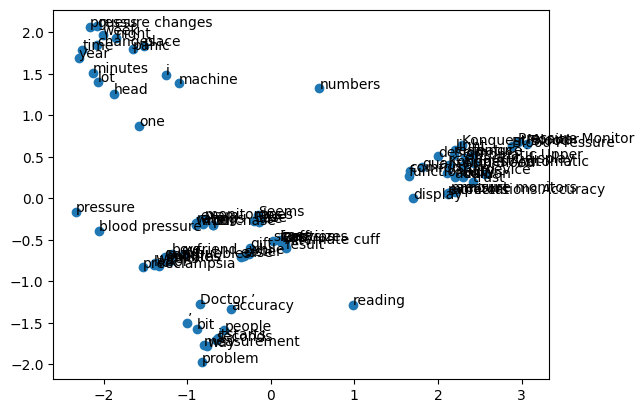

In [25]:
# Write your code here
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.chunk import RegexpParser
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# read in the data
df = pd.read_csv('reviews.csv')

# check for missing values and replace with empty strings
df['Review'].fillna('', inplace=True)

# extract all noun phrases from each review
noun_phrases = []
for review in df['Review']:
    tokens = word_tokenize(review)
    pos_tags = nltk.pos_tag(tokens)
    noun_chunks = []
    for i in range(len(pos_tags)):
        if pos_tags[i][1].startswith('NN'):
            noun_chunks.append(pos_tags[i][0])
            if i < len(pos_tags)-1 and pos_tags[i+1][1].startswith('NN'):
                noun_chunks[-1] += ' ' + pos_tags[i+1][0]
    noun_phrases.append(noun_chunks)

# convert float values to strings
sentences = [[str(word) for word in sentence] for sentence in noun_phrases]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

# Visualize the Word2Vec model
words = list(model.wv.index_to_key)[:100]
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# plot the scatter plot of the words
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()







# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


# The GitHub link of your final csv file


# Link:

https://github.com/Akhilchegonda/Akhil_INFO5731_Fall2023/blob/main/reviews_1.csv

